                                 Comprehensive Assessment : Machine Learning


In [ ]:
 1.loading and preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
data=pd.read_csv('carPrice_Assignment.csv')
data

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]

In [5]:
data.head()


car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [48]:
df.shape

(205, 26)

In [49]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [7]:
data.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [8]:
# Check for missing values
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [42]:
# Handle missing values if any
df.dropna(inplace=True)

In [43]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)


Series([], dtype: int64)


In [47]:
df_cleaned = df.dropna()
df_cleaned = df.dropna(axis=1)

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
if missing_columns.empty:
    print("No missing values in the dataset.")
else:
    print("There are still missing values in the dataset.")

No missing values in the dataset.


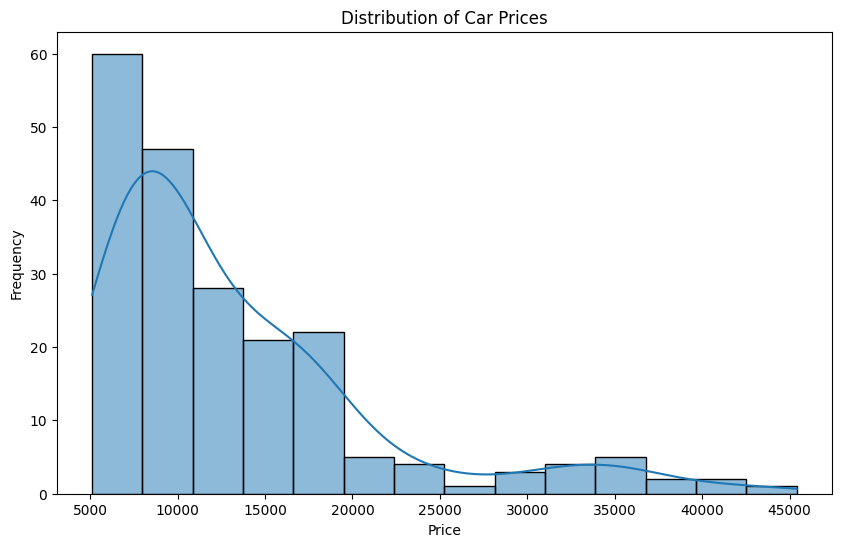

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

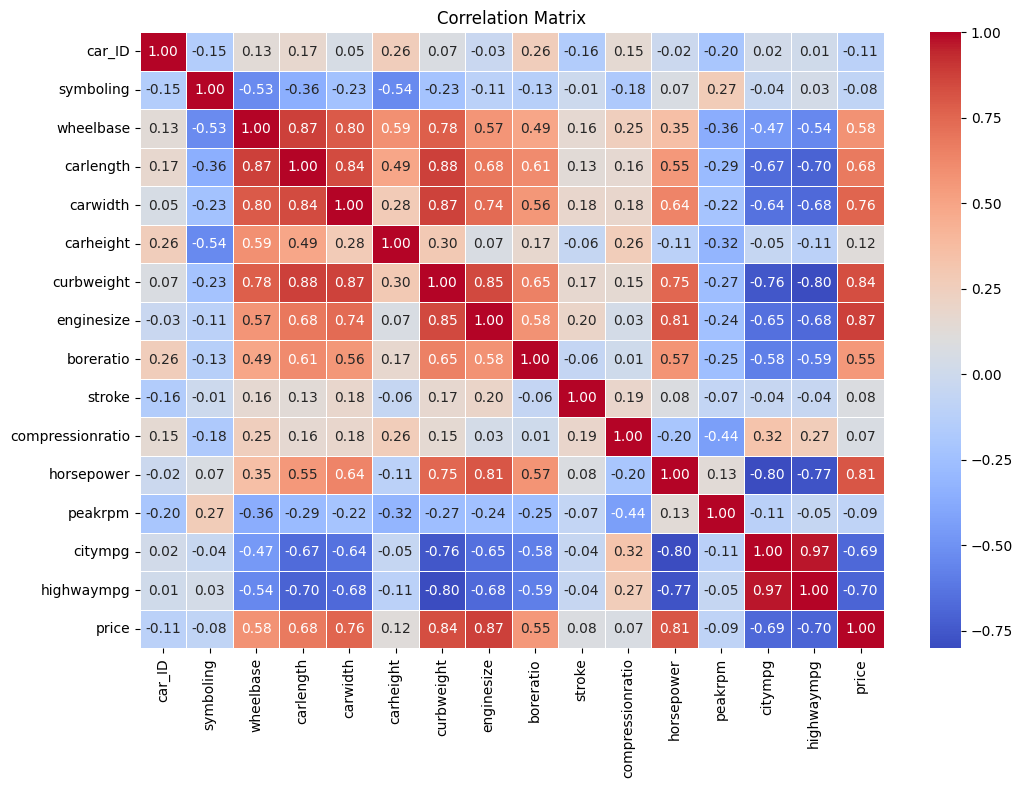

In [39]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df[numeric_cols].corr()
#draw heat map
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

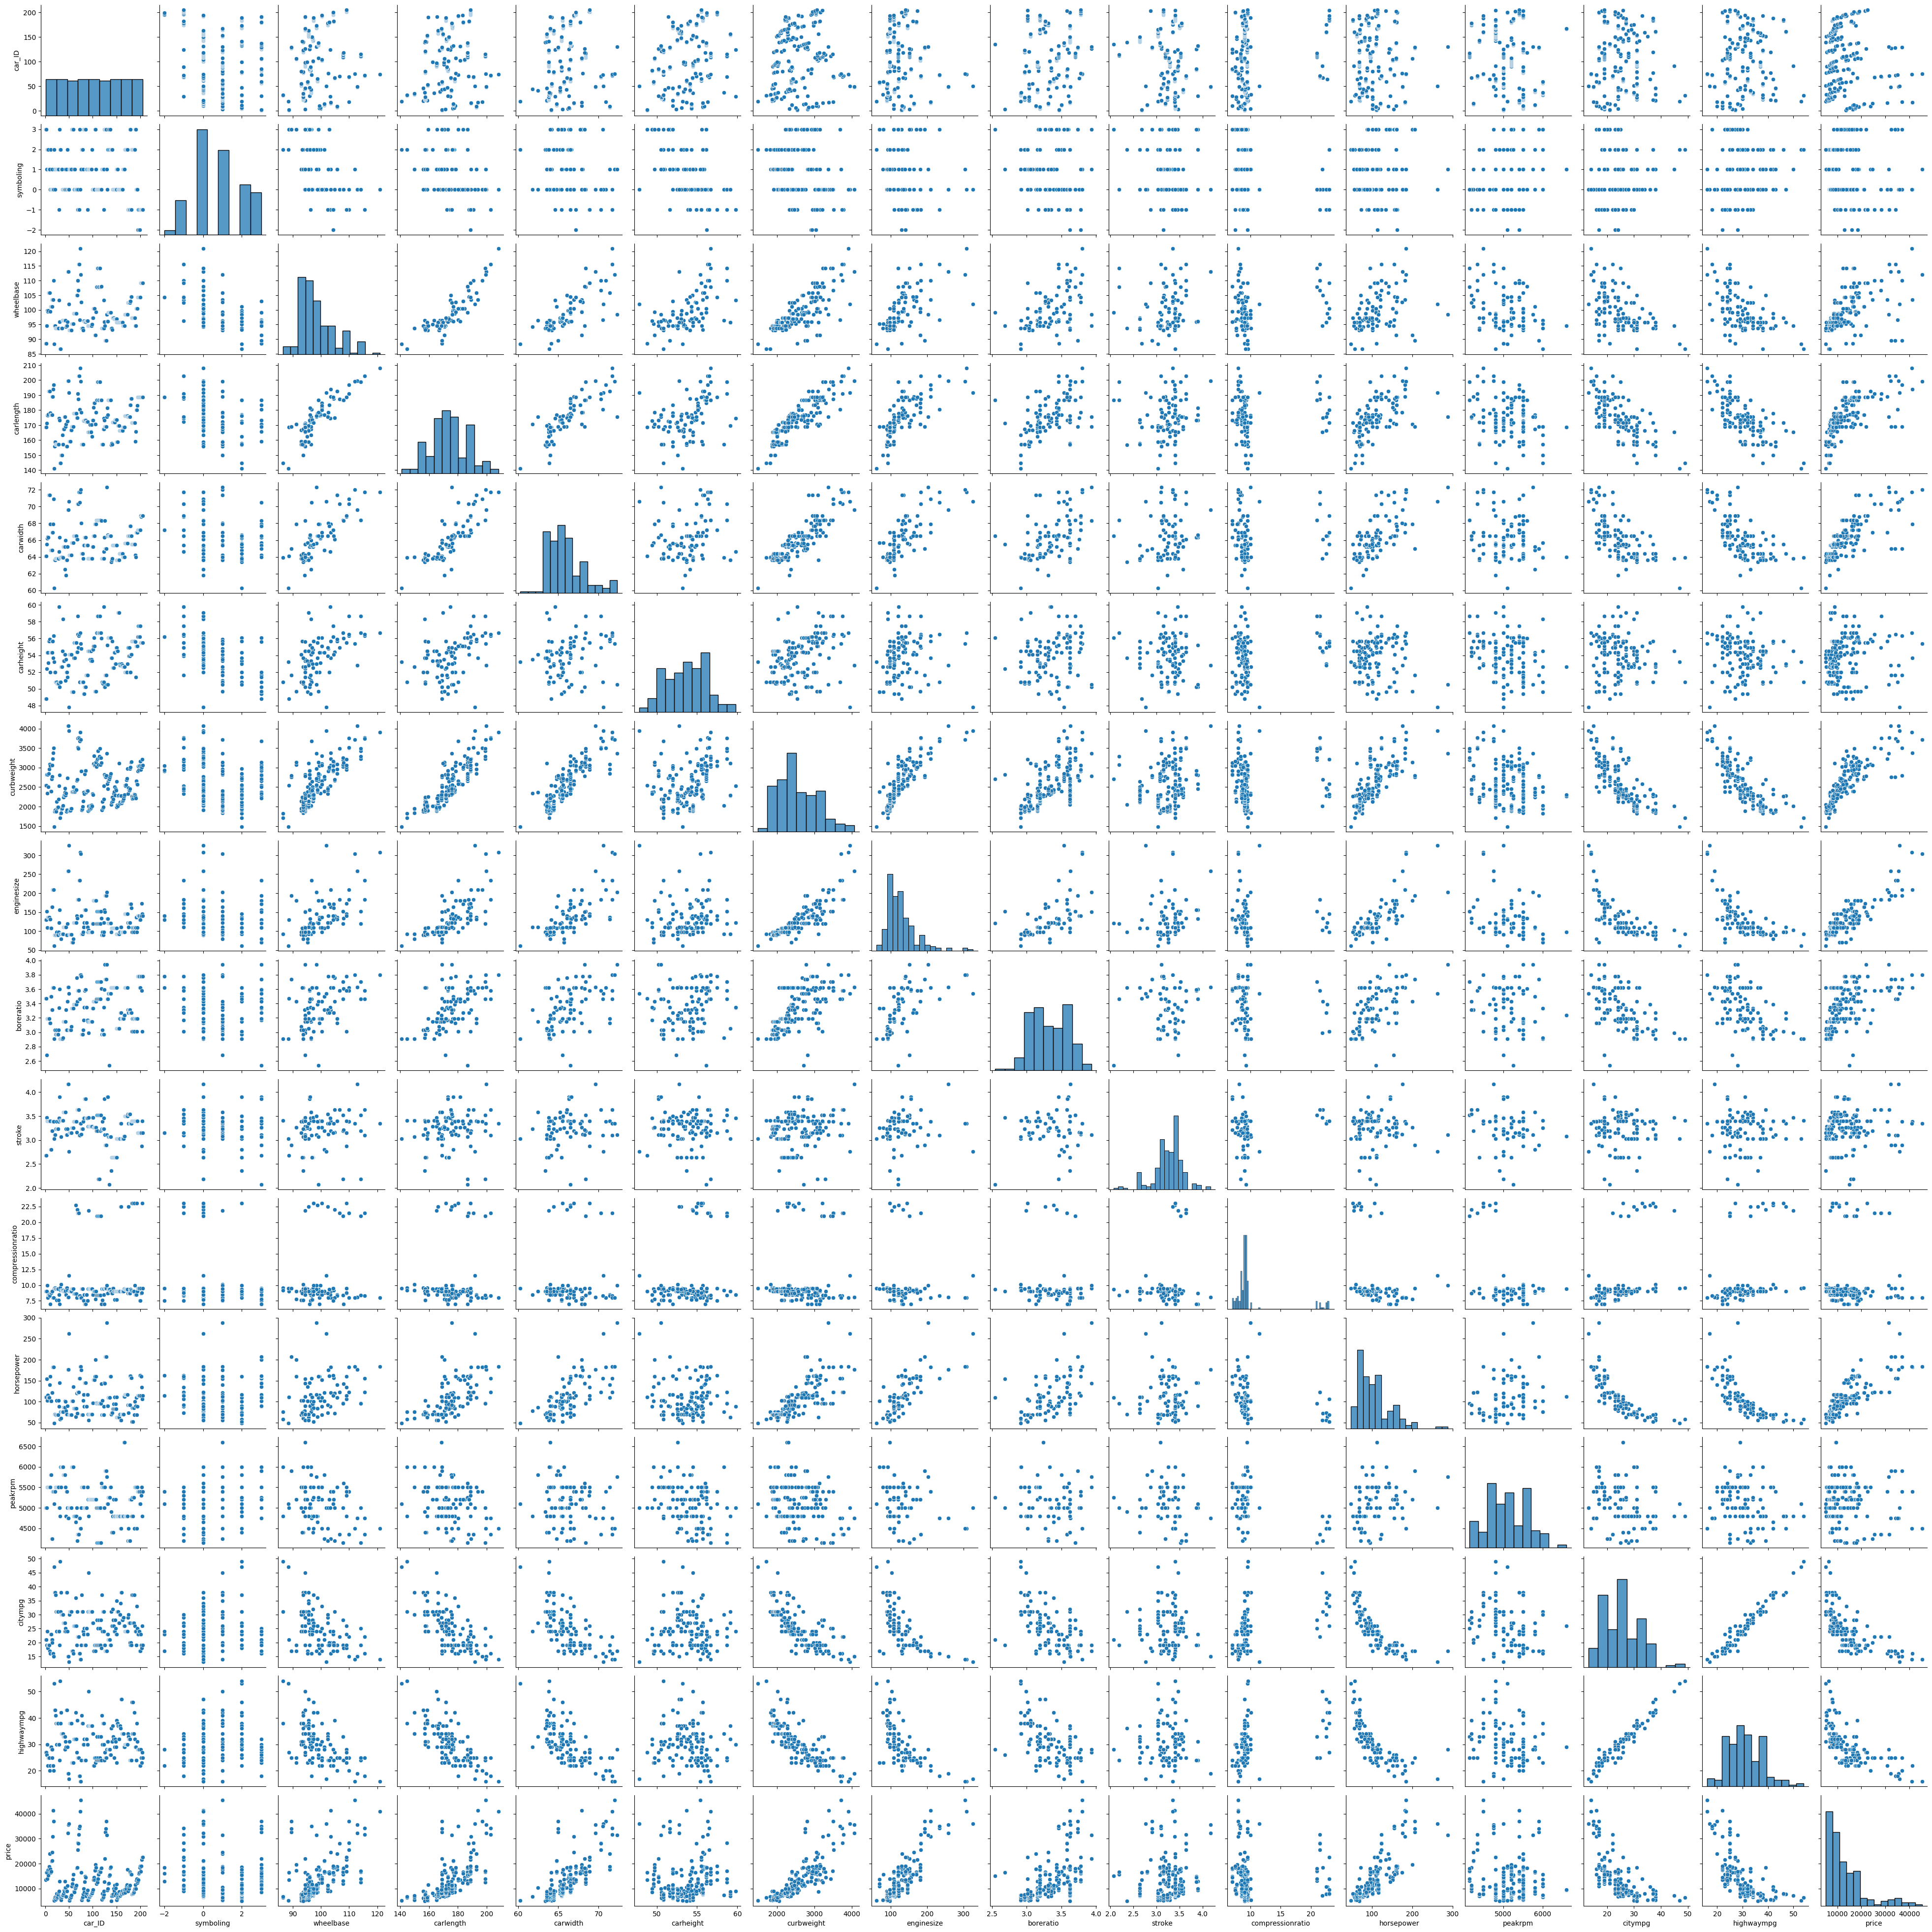

In [40]:
# Drop rows with missing values for pairplot
df_numeric = df[numeric_cols].dropna()

# Generate the pairplot
sns.pairplot(df_numeric)
plt.show()

In [9]:
# Convert categorical variables to dummy variables
data_encoded = pd.get_dummies(data, drop_first=True)

In [10]:
from sklearn.preprocessing import StandardScaler

# Separating features and target variable
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
 2. Model Implementation

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [13]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [14]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [16]:
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(X_train, y_train)

SVR()

In [ ]:
3.modal evaluation

In [17]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [18]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return r2, mse, mae

In [19]:
# Evaluate each model
results = {}
for name, model in zip(['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR'],
                        [model_lr, model_dt, model_rf, model_gb, model_svr]):
    r2, mse, mae = evaluate_model(model, X_test, y_test)
    results[name] = {'R2': r2, 'MSE': mse, 'MAE': mae}


In [20]:
# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                             R2           MSE           MAE
Linear Regression -3.357099e+22  2.650229e+30  1.083421e+15
Decision Tree      8.641454e-01  1.072491e+07  2.026785e+03
Random Forest      9.536219e-01  3.661273e+06  1.362415e+03
Gradient Boosting  9.332736e-01  5.267647e+06  1.629636e+03
SVR               -1.020678e-01  8.700167e+07  5.707022e+03


Best Performing Model
Random Forest Regressor is the best performing model based on the following reasons:

R-squared (R2):

Random Forest has the highest R2 value (0.9536), indicating it explains about 95.36% of the variance in the target variable. This is significantly better than the other models, especially the Linear Regression and SVR models, which have very poor R2 values.
Mean Squared Error (MSE):

Random Forest has the lowest MSE (3.661273e+06), which means it has the smallest average squared difference between predicted and actual values. This indicates that the model is making predictions that are closer to the actual values compared to the other models.
Mean Absolute Error (MAE):

Random Forest also has the lowest MAE (1.362415e+03), which reflects the smallest average absolute difference between predicted and actual values. This is a good indicator of the model’s performance in terms of how far off its predictions are, on average.
Justification
Random Forest performs well due to its ability to handle complex data and interactions between features by averaging multiple decision trees. This often results in better generalization and reduced overfitting compared to individual decision trees or simpler models like Linear Regression.

The poor performance of Linear Regression and SVR might be due to the complexity of the relationships between features and car prices, which these models may not capture effectively. SVR also has a negative R2, indicating that its predictions are worse than simply predicting the mean value.

Overall, the Random Forest Regressor shows the best balance between predictive accuracy (high R2, low MSE, and MAE) and robustness, making it the preferred choice for this dataset.

In [ ]:
4. Feature Importance Analysis


In [21]:
importances = model_rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

                         Feature  Importance
7                     enginesize    0.588249
6                     curbweight    0.230683
14                    highwaympg    0.044075
11                    horsepower    0.030306
0                         car_ID    0.019026
..                           ...         ...
123            CarName_subaru r2    0.000000
56   CarName_honda civic 1500 gl    0.000000
124        CarName_subaru trezia    0.000000
125       CarName_subaru tribeca    0.000000
143     CarName_vokswagen rabbit    0.000000

[190 rows x 2 columns]


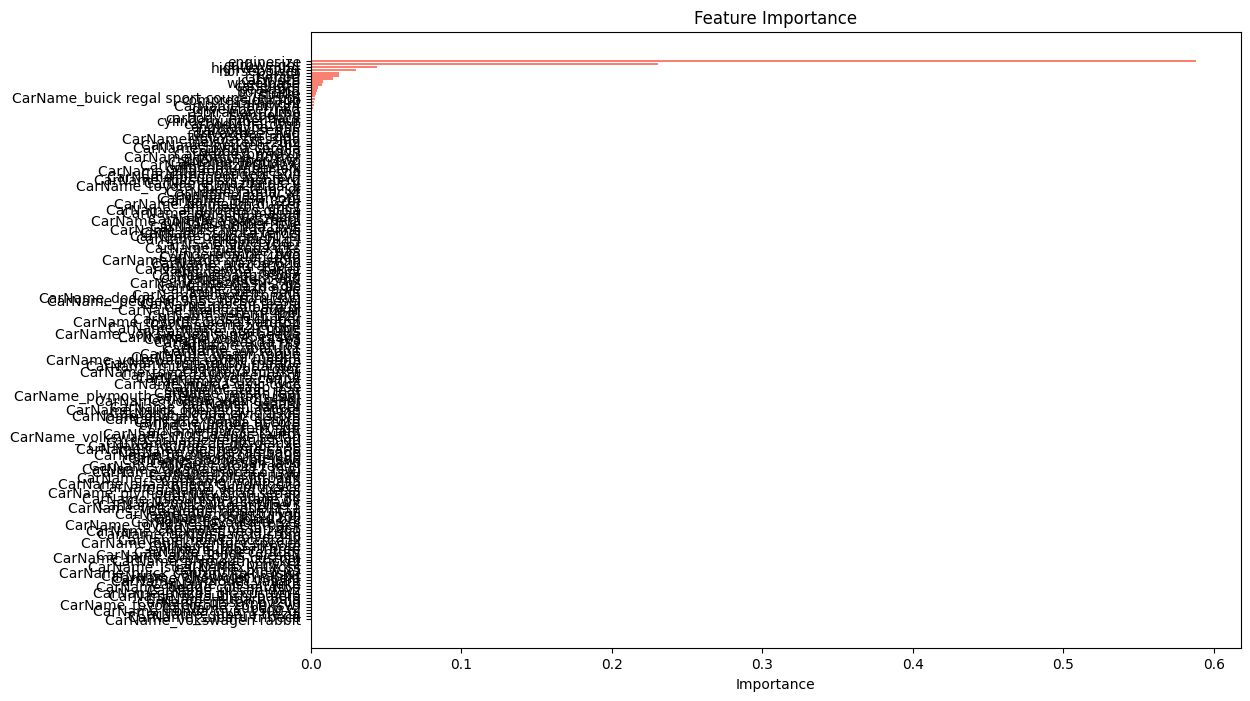

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='salmon')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

Key Features Affecting Car Prices
Based on the feature importances, the following variables have significant impacts on car prices:

Engine Size (enginesize) - Importance: 0.588249

Description: Engine size has the highest importance score, suggesting it is the most significant predictor of car prices. Larger engines generally imply higher prices due to increased power and potentially better performance.
Curb Weight (curbweight) - Importance: 0.230683

Description: Curb weight, which measures the weight of the car, is the second most important feature. Heavier cars typically cost more, possibly due to more robust construction and added features.
Highway MPG (highwaympg) - Importance: 0.044075

Description: Highway miles per gallon, which indicates fuel efficiency on highways, is less important compared to engine size and curb weight but still contributes to price determination.
Horsepower (horsepower) - Importance: 0.030306

Description: Horsepower is a relatively less important feature but still relevant. More powerful cars are often more expensive.
Features with Minimal or No Importance
Car ID (car_ID) - Importance: 0.019026

Description: The car ID has minimal importance and is likely a unique identifier that does not influence car price.
Car Names (CarName_*) - Importance: 0.000000

Description: Specific car names or models have negligible importance in predicting prices, as the model might have already captured this information through other features.

In [ ]:
5. Hyperparameter Tuning

In [22]:
from sklearn.model_selection import GridSearchCV

# Example for RandomForestRegressor
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]})

In [23]:
# Get the best model and parameters
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 20, 'n_estimators': 100}


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [25]:
# Initialize the tuned Random Forest model
tuned_model_rf = RandomForestRegressor(max_depth=20, n_estimators=100)


In [26]:
# Fit the model on the training data
tuned_model_rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=20)

In [27]:
# Predict on the test data
y_pred_tuned = tuned_model_rf.predict(X_test)


In [28]:
# Evaluate the tuned model
r2_tuned = r2_score(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)


In [29]:
print(f"Tuned Model R2: {r2_tuned}")
print(f"Tuned Model MSE: {mse_tuned}")
print(f"Tuned Model MAE: {mae_tuned}")

Tuned Model R2: 0.9544556576983939
Tuned Model MSE: 3595453.5096082673
Tuned Model MAE: 1332.912512195122


In [30]:
print(f"Baseline R2: {0.9536219}")
print(f"Baseline MSE: {3.661273e+06}")
print(f"Baseline MAE: {1.362415e+03}")


Baseline R2: 0.9536219
Baseline MSE: 3661273.0
Baseline MAE: 1362.415


In [31]:
print(f"Tuned Model R2: {r2_tuned}")
print(f"Tuned Model MSE: {mse_tuned}")
print(f"Tuned Model MAE: {mae_tuned}")

Tuned Model R2: 0.9544556576983939
Tuned Model MSE: 3595453.5096082673
Tuned Model MAE: 1332.912512195122


In [ ]:
Comparison of Model Performance
Baseline Model Performance:

R2: 0.9536219
MSE: 3,661,273.0
MAE: 1,362.415
Tuned Model Performance:

R2: 0.9544557
MSE: 3,595,453.5
MAE: 1,332.912
Analysis of Improvements
R-squared (R2):

Baseline: 0.9536
Tuned: 0.9545
Improvement: The R2 value of the tuned model is slightly higher, indicating that the tuned model explains a bit more of the variance in car prices. This is a small but positive improvement.
Mean Squared Error (MSE):

Baseline: 3,661,273.0
Tuned: 3,595,453.5
Improvement: The MSE of the tuned model is lower, meaning that the average squared difference between predicted and actual values has decreased. This suggests improved predictive accuracy.
Mean Absolute Error (MAE):

Baseline: 1,362.415
Tuned: 1,332.912
Improvement: The MAE of the tuned model is lower, indicating that the average absolute error has decreased. This means the tuned model provides slightly more accurate predictions on average.

In [ ]:
Significant Variables: Variables with the highest importance scores from the feature importance analysis are most influential in predicting car prices. Commonly, variables like engine size, curb weight, and horsepower are significant.

Model Performance: Evaluate the R2, MSE, and MAE to understand how well your models are describing car prices. Higher R2 and lower MSE and MAE indicate better performance.